In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

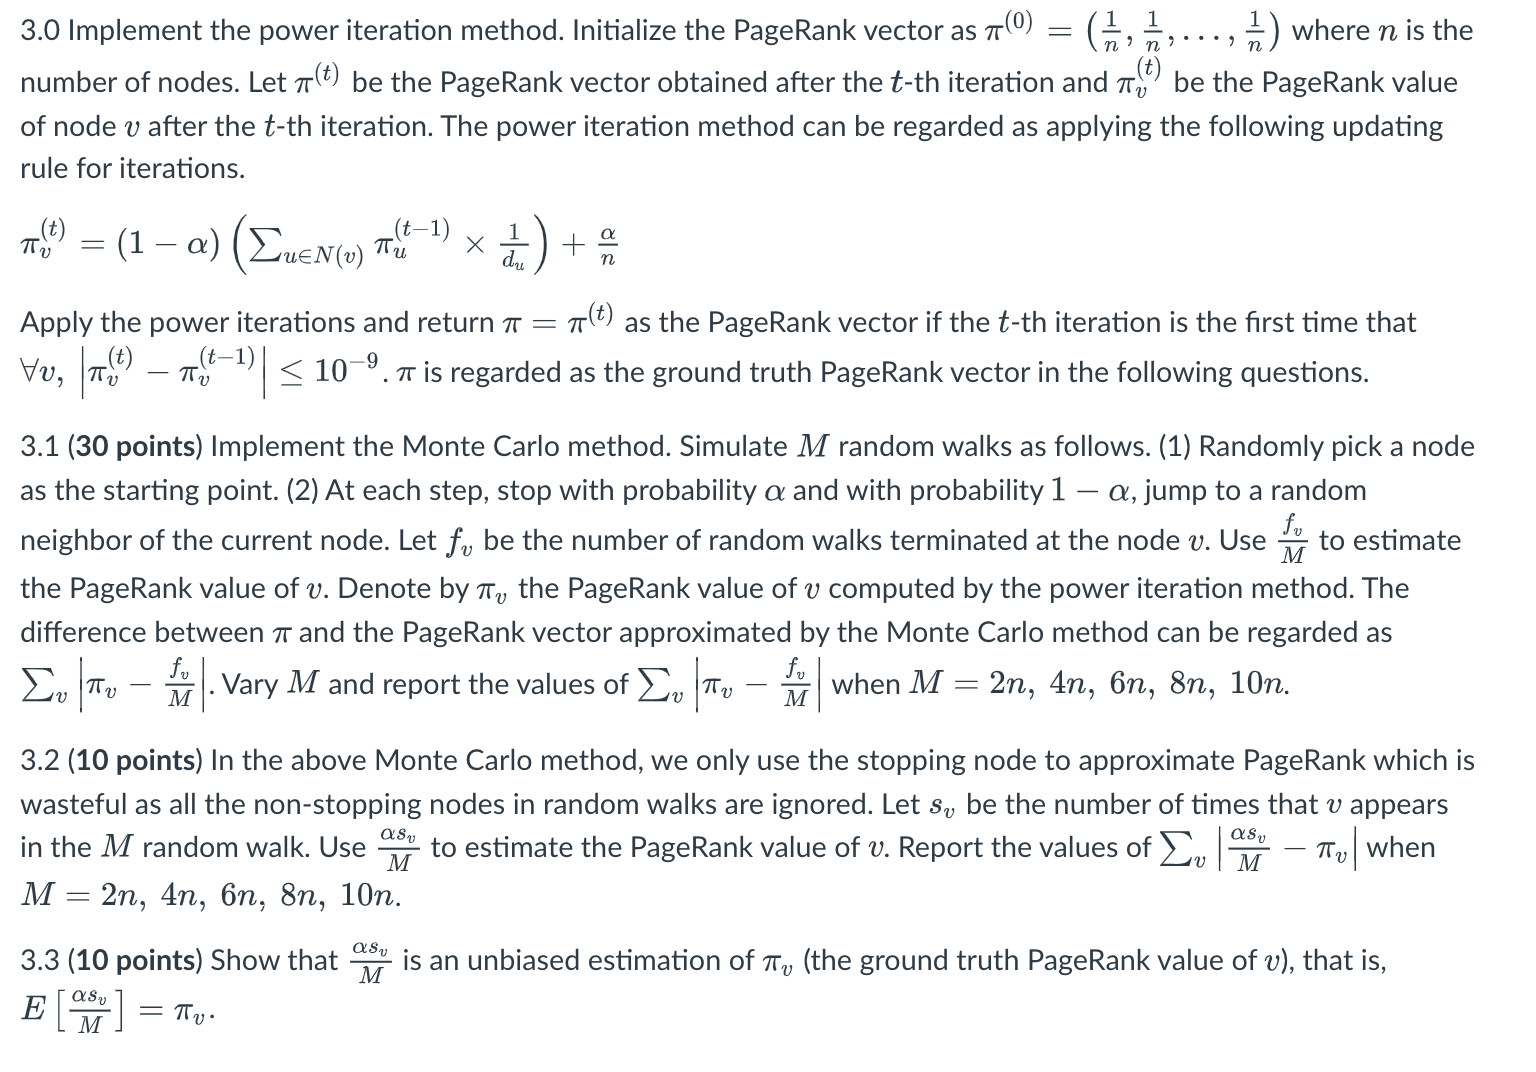

## 3.1

In [2]:
class Graph:
    def __init__(self):
        self.nodes={}
    
    def construct_graph(self):
        with open("com-dblp.txt") as file:
            df = file.readlines()[4:]
        for line in df:
            f,t=map(int,(line.split()))
            if f not in self.nodes:
                self.nodes[f]=[]
            if t not in self.nodes:
                self.nodes[t]=[]
            self.nodes[f].append(t)
            self.nodes[t].append(f)
    
    def random_walk(self, M, alpha = 0.15):
        import random
        visiting_nodes = [0]*len(self.nodes)
        terminating_nodes = [0]*len(self.nodes)
        for i in range(M):
            node = random.randint(0,len(self.nodes)-1)
            visiting_nodes[node]+=1
            rand_num = random.random()
            while rand_num>alpha:
                node = random.choice(self.nodes[node])
                visiting_nodes[node]+=1
                rand_num = random.random()
            terminating_nodes[node]+=1
        page_rank = {node:terminating_nodes[node]/M for node in self.nodes}
        pi = self.power_iteration(alpha)
        diff = sum([abs(pi[node] - page_rank[node]) for node in self.nodes])
        return diff
        
    def power_iteration(self,alpha):
        pi_1 = {node:1/len(self.nodes) for node in self.nodes}
        pi_2 = {node:0 for node in self.nodes}
        abs_diff = max([abs(pi_1[node] - pi_2[node]) for node in self.nodes])
        while abs_diff >= 1e-9:
            for node,neigh in self.nodes.items():
                if len(neigh)>0:
                    for neigh_node in neigh:
                        pi_2[neigh_node]+=pi_1[node]/len(neigh)
            pi_2={node:(1-alpha)*pi_2[node]+alpha/len(self.nodes) for node in self.nodes}
            abs_diff=max([abs(pi_1[node]-pi_2[node]) for node in self.nodes])
            pi_1=pi_2
            pi_2={node:0 for node in self.nodes}
        return pi_1

In [3]:
graph = Graph()
graph.construct_graph()

In [4]:
answers = []
for i in [2,4,6,8,10]:
    temp = graph.random_walk(i*len(graph.nodes))
    print('For M = ' + str(i) + 'n, difference = ' + str(temp))
    answers.append(temp)

For M = 2n, difference = 0.5236544675679615
For M = 4n, difference = 0.3696326597377792
For M = 6n, difference = 0.30217484725704746
For M = 8n, difference = 0.26145508842861953
For M = 10n, difference = 0.23372436232096142


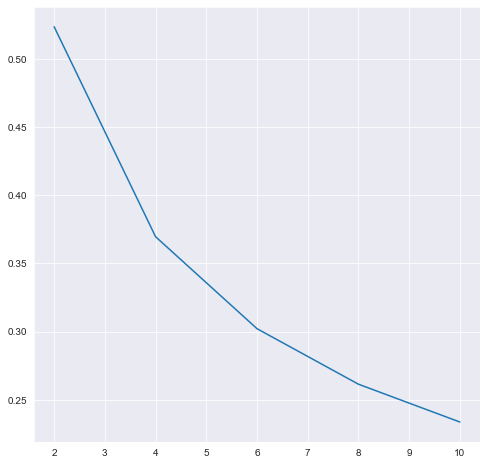

In [5]:
plt.figure(figsize=(8,8));
sns.lineplot(x = [2,4,6,8,10], y = answers);

## 3.2

In [6]:
class Graph:
    def __init__(self):
        self.nodes={}
    
    def construct_graph(self):
        with open("com-dblp.txt") as file:
            df = file.readlines()[4:]
        for line in df:
            f,t=map(int,(line.split()))
            if f not in self.nodes:
                self.nodes[f]=[]
            if t not in self.nodes:
                self.nodes[t]=[]
            self.nodes[f].append(t)
            self.nodes[t].append(f)
    
    def random_walk(self, M, alpha = 0.15):
        import random
        visiting_nodes = [0]*len(self.nodes)
        terminating_nodes = [0]*len(self.nodes)
        for i in range(M):
            node = random.randint(0,len(self.nodes)-1)
            visiting_nodes[node]+=1
            rand_num = random.random()
            while rand_num>alpha:
                node = random.choice(self.nodes[node])
                visiting_nodes[node]+=1
                rand_num = random.random()
            terminating_nodes[node]+=1
        page_rank = {node:alpha*visiting_nodes[node]/M for node in self.nodes} # pagerank computed based on visitation of each node
        pi = self.power_iteration(alpha)
        diff = sum([abs(pi[node] - page_rank[node]) for node in self.nodes])
        return diff
        
    def power_iteration(self,alpha):
        pi_1 = {node:1/len(self.nodes) for node in self.nodes}
        pi_2 = {node:0 for node in self.nodes}
        abs_diff = max([abs(pi_1[node] - pi_2[node]) for node in self.nodes])
        while abs_diff >= 1e-9:
            for node,neigh in self.nodes.items():
                if len(neigh)>0:
                    for neigh_node in neigh:
                        pi_2[neigh_node]+=pi_1[node]/len(neigh)
            pi_2={node:(1-alpha)*pi_2[node]+alpha/len(self.nodes) for node in self.nodes}
            abs_diff=max([abs(pi_1[node]-pi_2[node]) for node in self.nodes])
            pi_1=pi_2
            pi_2={node:0 for node in self.nodes}
        return pi_1

In [7]:
graph = Graph()
graph.construct_graph()

In [8]:
answers = []
for i in [2,4,6,8,10]:
    temp = graph.random_walk(i*len(graph.nodes))
    print('For M = ' + str(i) + 'n, difference = ' + str(temp))
    answers.append(temp)

For M = 2n, difference = 0.24879891206906074
For M = 4n, difference = 0.17649052606695081
For M = 6n, difference = 0.14351006578147946
For M = 8n, difference = 0.12474383551489271
For M = 10n, difference = 0.11117781590692849


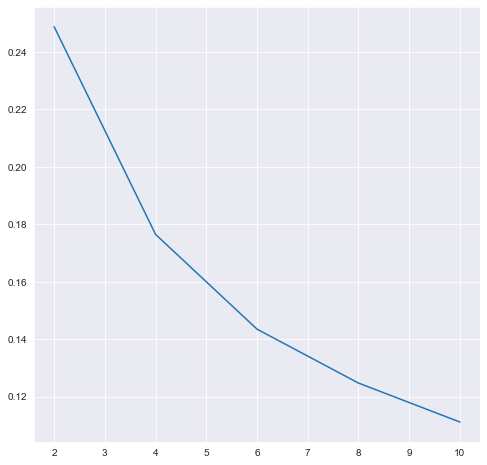

In [9]:
plt.figure(figsize=(8,8));
sns.lineplot(x = [2,4,6,8,10], y = answers);